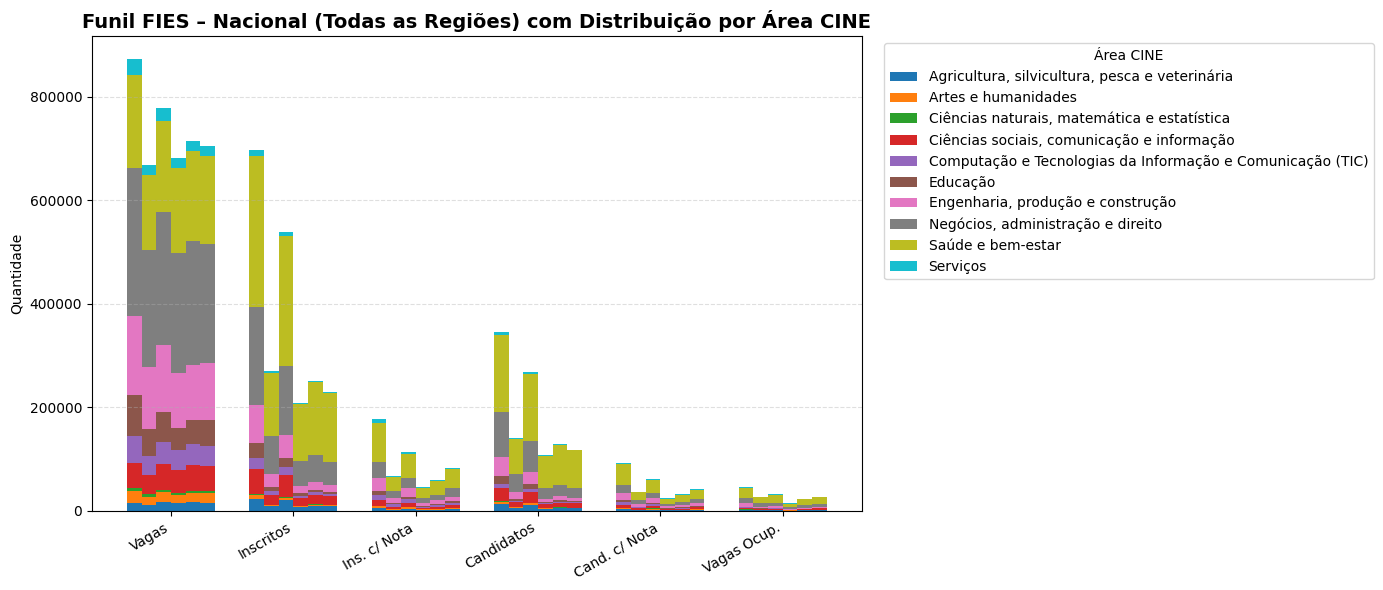

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Ler arquivo ---
path_funil_regiao = '../../../planilhas/processado/modulo_3/funil_e_candidatos_unicos/funil_por_regiao.csv'
df = pd.read_csv(path_funil_regiao)

# --- 2. Criar coluna de período (ano + semestre) ---
df['periodo'] = df['ano'].astype(str) + '.' + df['semestre'].astype(str)

# --- 3. Definir colunas e nomes curtos ---
colunas_funil = [
    'vagas_fies',
    'Inscritos_Geral',
    'inscritos_com_nota_suficiente',
    'Candidatos_Unicos_Geral',
    'candidatos_unicos_com_nota_suficiente',
    'vagas_ocupadas'
]

nomes_curto = {
    'vagas_fies': 'Vagas',
    'Inscritos_Geral': 'Inscritos',
    'inscritos_com_nota_suficiente': 'Ins. c/ Nota',
    'Candidatos_Unicos_Geral': 'Candidatos',
    'candidatos_unicos_com_nota_suficiente': 'Cand. c/ Nota',
    'vagas_ocupadas': 'Vagas Ocup.'
}

# --- 4. Agregar dados a nível nacional (somando todas as regiões) ---
df_nacional = (
    df.groupby(['periodo', 'nome_cine_area_geral'])[colunas_funil]
    .sum()
    .reset_index()
)

# --- 5. Parâmetros básicos ---
areas = sorted(df_nacional['nome_cine_area_geral'].unique())
periodos = sorted(df_nacional['periodo'].unique())
largura_barra = 0.12
cores_areas = plt.cm.tab10(np.linspace(0, 1, len(areas)))  # paleta para as áreas

# --- 6. Criar gráfico nacional ---
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(colunas_funil))
deslocamentos = np.linspace(-largura_barra * 2.5, largura_barra * 2.5, len(periodos))

for desloc, periodo in zip(deslocamentos, periodos):
    df_periodo = df_nacional[df_nacional['periodo'] == periodo]
    base = np.zeros(len(colunas_funil))

    for cor, area in zip(cores_areas, areas):
        valores = df_periodo[df_periodo['nome_cine_area_geral'] == area][colunas_funil]
        if valores.empty:
            valores = [0]*len(colunas_funil)
        else:
            valores = valores.values[0]

        ax.bar(
            x + desloc,
            valores,
            width=largura_barra,
            bottom=base,
            color=cor,
            label=area if periodo == periodos[0] else ""
        )
        base += valores

ax.set_xticks(x)
ax.set_xticklabels([nomes_curto[c] for c in colunas_funil], rotation=30, ha='right')
ax.set_ylabel('Quantidade')
ax.set_title('Funil FIES – Nacional (Todas as Regiões) com Distribuição por Área CINE', fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='Área CINE', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=1)

plt.tight_layout()
plt.show()